# T-test

In [14]:
import pandas as pd
from scipy import stats # ÌÜµÍ≥Ñ Î™®Îìà Î∂àÎü¨Ïò§Í∏∞
import numpy as np
import matplotlib.pyplot as plt #ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ
import seaborn as sns 


df = pd.read_csv("nyc_citibike.csv")
df

start_date    end_date  start_hour  end_hour  trip_duration  \
0      2018-05-01  2018-05-01           4         4            390   
1      2018-05-01  2018-05-01           1         1            854   
2      2018-05-01  2018-05-01           4         4            526   
3      2018-05-01  2018-05-01           3         3            885   
4      2018-05-01  2018-05-01           1         1            324   
...           ...         ...         ...       ...            ...   
72030  2018-05-01  2018-05-01          23        23            207   
72031  2018-05-01  2018-05-01          23        23            356   
72032  2018-05-01  2018-05-01          22        23            516   
72033  2018-05-01  2018-05-01          22        23            427   
72034  2018-05-01  2018-05-01          23        23            417   

       start_station_id          start_station_name  start_station_latitude  \
0                  3002  South End Ave & Liberty St               40.711512   
1                  3611         Vernon Blvd & 47 Rd               40.744907   
2                   515            W 43 St & 10 Ave               40.760094   
3                  3641          Broadway & W 25 St               40.742869   
4                  3440        Fulton St & Adams St               40.692418   
...                 ...                         ...                     ...   
72030              3452      Bayard St & Leonard St               40.719156   
72031               151    Cleveland Pl & Spring St               40.722104   
72032               526             E 33 St & 5 Ave               40.747659   
72033               379             W 31 St & 7 Ave               40.749156   
72034               445          E 10 St & Avenue A               40.727408   

       start_station_longitude  end_station_id             end_station_name  \
0                   -74.015756              79     Franklin St & W Broadway   
1                   -73.953457            3572               34 Ave & 38 St   
2                   -73.994618             388             W 26 St & 10 Ave   
3                   -73.989186             336  Sullivan St & Washington Sq   
4                   -73.989495            3308         Kane St & Clinton St   
...                        ...             ...                          ...   
72030               -73.948854            3107     Bedford Ave & Nassau Ave   
72031               -73.997249             319         Fulton St & Broadway   
72032               -73.984907             435              W 21 St & 6 Ave   
72033               -73.991600             477              W 41 St & 8 Ave   
72034               -73.981420             285           Broadway & E 14 St   

       end_station_latitude  end_station_longitude  bike_id    usertype  \
0                 40.719116             -74.006667    21105  Subscriber   
1                 40.756913             -73.921631    32219  Subscriber   
2                 40.749718             -74.002950    33433  Subscriber   
3                 40.730477             -73.999061    32028  Subscriber   
4                 40.686176             -73.996453    26425  Subscriber   
...                     ...                    ...      ...         ...   
72030             40.723117             -73.952123    16883  Subscriber   
72031             40.711066             -74.009447    17406  Subscriber   
72032             40.741740             -73.994156    29964  Subscriber   
72033             40.756405             -73.990026    20511  Subscriber   
72034             40.734546             -73.990741    17772  Subscriber   

       birth_year  gender  day_since_register  
0            1945    male                  36  
1            1998    male                  29  
2            1954    male                  55  
3            1963    male                  32  
4            1965    male                  34  
...           ...     ...                 ...  
72030        1994  female      

In [15]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #Îß•os ÏÇ¨Ïö©ÏûêÏùò Í≤ΩÏö∞
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#ÏúàÎèÑÏö∞ ÏÇ¨Ïö©ÏûêÏùò Í≤ΩÏö∞
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# Îã®Ïùº ÌëúÎ≥∏ T-test 
nyc_citibike.csv Îç∞Ïù¥ÌÑ∞Ïùò trip_duration ÏπºÎüºÏóêÏÑú<br/>
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Î™®ÏßëÎã®ÏúºÎ°ú Ïó¨Í∏∞Í≥†, 40Í∞úÏùò ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌï¥ Î™®ÌèâÍ∑†Ïóê ÎåÄÌïú Îã®Ïùº ÌëúÎ≥∏ T-test Î•º ÏßÑÌñâÌï¥Î≥¥Ïûê<br/>


#### Í∞ÄÏÑ§ÏÑ∏Ïö∞Í∏∞ H0: $\mu$ = $\mu$0 ,  H0: $\mu$ ‚â† $\mu$0

Skewness: 116.002624
Kurtosis: 15913.196644


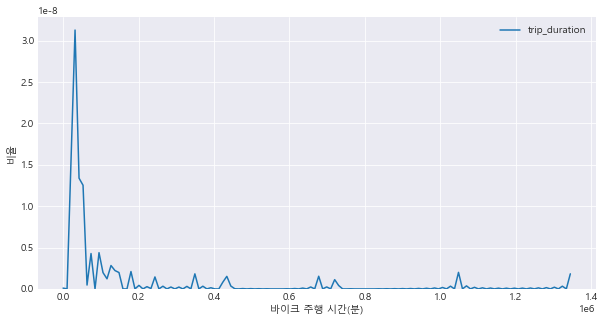

In [16]:
#trip_durationÏùò Î∂ÑÌè¨ Îç∞Ïù¥ÌÑ∞
td=df.trip_duration #trip_duration Îç∞Ïù¥ÌÑ∞Îßå tdÎùºÍ≥† Ï†ÄÏû•ÌïòÍ∏∞

plt.figure(figsize=(10,5))
kdep=sns.kdeplot(td) 
kdep.set_xlabel("Î∞îÏù¥ÌÅ¨ Ï£ºÌñâ ÏãúÍ∞Ñ(Î∂Ñ)")
kdep.set_ylabel("ÎπÑÏú®")
print("Skewness: %f" % td.skew()) #Skewness: ÏôúÎèÑ, Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÎåÄÏπ≠ÏÑ± Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÉÑ. 0Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎπÑÏä∑
print("Kurtosis: %f" % td.kurt()) #Kurtosis: Ï≤®ÎèÑ, Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Ïùò ÎΩÄÏ°±Ìïú Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÉÑ. 0Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù Ï†ïÍ∑ú Î∂ÑÌè¨ÏôÄ ÎπÑÏä∑
plt.show() 

Í≥ºÌïòÍ≤å ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏ†∏ ÏûàÏúºÎãà, Ï†ÑÏ≤¥ Î∂ÑÌè¨Ïóê ÎπÑÌï¥ ÎÑàÎ¨¥ ÌÅ∞ Í∞íÎì§Ïù¥ ÏûàÎã§. Ïù¥ Í∞íÎì§ÏùÑ outlierÎ°ú Ï†úÍ±∞Ìï¥ Ï£ºÏûê<br/>
#### ÎòêÌïú, Ïù¥Î†áÍ≤å Í≥ºÌïòÍ≤å ÌÅ¨Í±∞ÎÇò ÏûëÏùÄ Í∞íÎì§Ïù¥ ÏûàÎäî Î∂ÑÌè¨Îäî ÌèâÍ∑†Ïù¥ Ïù¥ ÏÜåÏàòÏùò Í∞íÎì§Ïóê ÏùòÌï¥ Ï¢åÏßÄÏö∞ÏßÄ ÎêòÎØÄÎ°ú, ÌèâÍ∑† ÎπÑÍµêÍ∞Ä ÏùòÎØ∏Í∞Ä ÏóÜÎã§

Skewness: 0.863209
Kurtosis: -0.108253


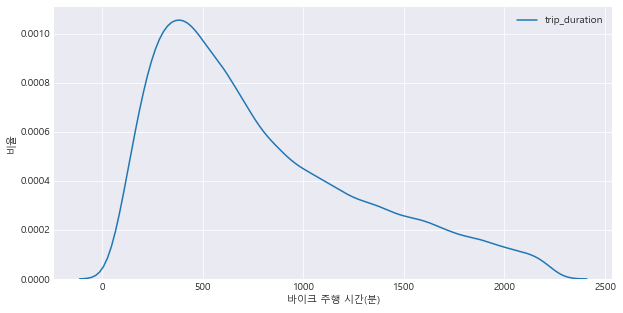

In [17]:
td_cut=td[td<td.quantile(0.95)]#tdÍ∞í Ï§ë ÏÉÅÏúÑ 5% ÎπºÏ£ºÍ∏∞
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(td_cut) 
kdep.set_xlabel("Î∞îÏù¥ÌÅ¨ Ï£ºÌñâ ÏãúÍ∞Ñ(Î∂Ñ)")
kdep.set_ylabel("ÎπÑÏú®")
print("Skewness: %f" % td_cut.skew())
print("Kurtosis: %f" % td_cut.kurt())
plt.show() 

Ï≤®ÎèÑÏôÄ ÏôúÎèÑÍ∞Ä ÎßéÏù¥ Ï§ÑÏñ¥Îì§ÏóàÎã§. Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ ÎèôÏùºÌïòÏßÄÎäî ÏïäÏßÄÎßå Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê ÎπÑÏä∑Ìï† ÏàòÎ°ù ÌÅ¨Í∏∞Í∞Ä ÌÅ∞ ÌëúÎ≥∏Ïóê ÎåÄÌï¥ Ï†ïÍ∑úÏÑ±ÏùÑ Î≥¥Ïû•ÌïòÎäî Ï†ïÎèÑÍ∞Ä Í∞ïÌï¥ÏßÑÎã§

In [18]:
# trip_durationÏùò ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®

avg = td_cut.mean()
std = td_cut.std()
print('ÌèâÍ∑† :',avg,'ÌëúÏ§Ä Ìé∏Ï∞® :',std)

ÌèâÍ∑† : 786.3930612185248 ÌëúÏ§Ä Ìé∏Ï∞® : 509.4961402212798


### H0: $\mu$ = 786 

In [19]:
# ÎûúÎç§ÌïòÍ≤å 40Í∞úÏùò ÎÇúÏàòÎ•º Ï∂îÏ∂ú

np.random.seed(1)
rand_40 = np.random.choice(td_cut, 40) #ÎûúÎç§ Ï∂îÏ∂ú

In [20]:
#Îã®Ïùº ÌëúÎ≥∏ t-test : Ï†ïÎßê ÌèâÍ∑†Ïù¥ 786ÏùºÍπå?
#Ho: ÌèâÍ∑† = 786
#H1: ÌèâÍ∑† != 786
tTestResult= stats.ttest_1samp(rand_40, 786) #stats.ttest_1samp -> Îã®Ïùº ÌëúÎ≥∏ ttest
print("T-statistic : %.3f  p-value : %.3f" % tTestResult)

T-statistic : 0.045  p-value : 0.964


#### p-value Í∞Ä 0.05Î≥¥Îã§ ÏõîÎì±Ìûà ÌÅ¨ÎØÄÎ°ú H0 Î•º Í∏∞Í∞ÅÌï† Ïàò ÏóÜÎã§. Ï¶â, Î™®ÌèâÍ∑†ÏùÄ 786Ïù¥Îã§. 

In [21]:
#stats.ttest_1samp(sample,value)Î•º ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏù¥ (Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ, p-value)Ïùò tuple ÏûêÎ£åÍ∞Ä ÎßåÎì§Ïñ¥Ïßê. 
tTestResult

Ttest_1sampResult(statistic=0.045201914863605676, pvalue=0.964177029201091)

### Îã®Ïùº ÌëúÎ≥∏ t-testÏùò Í≤ΩÏö∞ Ï†ïÍ∑úÏÑ±ÏùÑ Ï≤¥ÌÅ¨ Ìï¥ Ï§òÏïº ÌïòÏßÄÎßå ÌëúÎ≥∏Ïùò ÌÅ¨Í∏∞Í∞Ä 40ÏúºÎ°ú Ï∂©Î∂ÑÌûà ÌÅ¨ÎØÄÎ°ú ÏÉùÎûµ
(Ï§ëÏã¨Í∑πÌïúÏ†ïÎ¶¨)

##  ÌëúÎ≥∏Ïùò ÌÅ¨Í∏∞Í∞Ä ÏûëÏùÄ Í≤ΩÏö∞ (n=15)

In [22]:
# ÎûúÎç§ÌïòÍ≤å 15Í∞úÏùò ÎÇúÏàòÎ•º Ï∂îÏ∂ú

np.random.seed(1)
rand_15 = np.random.choice(td_cut, 15) #ÎûúÎç§ Ï∂îÏ∂ú

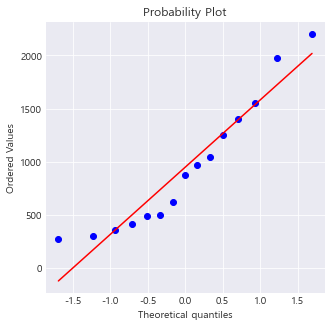

In [23]:
#QQ-plot: Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÏãúÌÇ§ÎäîÏßÄ Î≥¥Í∏∞ ÏúÑÌïú Í∑∏ÎûòÌîÑÎ°ú Îπ®Í∞Ñ ÏÑ†Ïóê Í∑ºÏ†ëÌïòÍ≤å Ï†êÏù¥ Î∂ÑÌè¨ Îê† ÏàòÎ°ù Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±
from scipy.stats import probplot
plt.figure(figsize=(5,5))
probplot(rand_15, plot=plt) # qqplotÏùÑ Í∑∏Î†§Ï£ºÎäî Ìï®Ïàò
plt.show()

In [24]:
#Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï : shapiro test
#H0: Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïúÎã§.
#H1: Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÎã§.
from scipy import stats
print('Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ïÏùò P-valueÎäî ' , stats.shapiro(rand_15)[1])

Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ïÏùò P-valueÎäî  0.11000926792621613


In [25]:
#Ïù¥ Í∞íÎèÑ (Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâ, p-value) ÏàúÏÑúÎùºÏÑú [1]Î°ú p-value Ìò∏Ï∂ú
stats.shapiro(rand_15)

ShapiroResult(statistic=0.9041135311126709, pvalue=0.11000926792621613)

P-valueÍ∞Ä 0.05Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÍ≥†, Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±.

# ÎèÖÎ¶Ω ÌëúÎ≥∏ T-test
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Î™®ÏßëÎã®ÏúºÎ°ú Ïó¨Í∏∞Í≥†,ÎèÖÎ¶Ω ÌëúÎ≥∏ T-test Î•º ÏßÑÌñâÌï¥Î≥¥Ïûê.  
Ï∂úÏÉù ÎÖÑÎèÑÏóê Îî∞Îùº ÏÇ¨Ïö©ÏûêÏùò ÏûêÏ†ÑÍ±∞ ÏÇ¨Ïö© ÏãúÍ∞Ñ(trip_duration)Ïùò ÌèâÍ∑†ÏùÑ ÎπÑÍµêÌïòÏûê 

->birth_yearÏóêÏÑú 2 Í∑∏Î£πÏùÑ Ï†ïÌïòÍ≥† 40Î™Ö Ïî© ÎΩëÏïÑ ÌëúÎ≥∏ÏùÑ ÎßåÎì§Ïñ¥ Í∞Å trip_durationÏùò ÌèâÍ∑†ÏùÑ ÎπÑÍµêÌï¥Î≥¥Ïûê!

In [26]:
data.birth_year.value_counts()
#1988ÎÖÑ ÏÉùÍ≥º 1990ÎÖÑÏÉù ÎπÑÍµê!

1969    7980
1988    2661
1990    2621
1989    2600
1991    2564
        ... 
1894       1
1895       1
1938       1
1918       1
1885       1
Name: birth_year, Length: 84, dtype: int64

In [27]:
td_88=df[df.birth_year==1988].trip_duration
td_90=df[df.birth_year==1990].trip_duration

In [28]:
#Îã®Ïùº ÌëúÎ≥∏ÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏÉÅÏúÑ 5% Ï†úÍ±∞
td_88_cut=td_88[td_88<td_88.quantile(0.95)]
td_90_cut=td_90[td_90<td_90.quantile(0.95)]

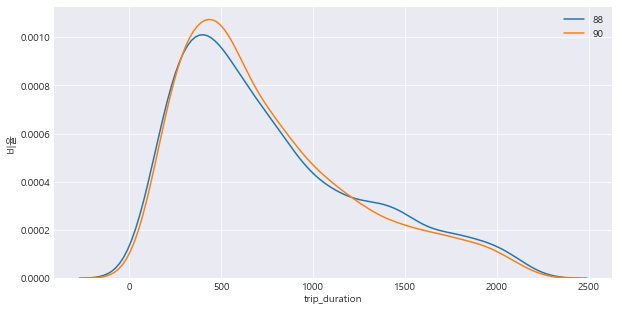

In [29]:
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(td_88_cut) 
sns.kdeplot(td_90_cut)
kdep.set_xlabel("trip_duration")
kdep.set_ylabel("ÎπÑÏú®")
plt.legend(['88','90'])# Í∑∏ÎûòÌîÑÎßàÎã§ Ïù¥Î¶ÑÏùÑ Î∂ôÏó¨Ï§å!
plt.show() 

### H0: $\mu_x=\mu_y$

In [30]:
#ÎèÖÎ¶Ω ÌëúÎ≥∏ t-Í≤ÄÏ†ï
#Í∞ÅÍ∞Å 40Í∞úÏî© Ï∂îÏ∂ú
np.random.seed(2)

group1 = np.random.choice(td_88_cut, 40) 
group2 = np.random.choice(td_90_cut, 40) 

Îëê ÌëúÎ≥∏ Î™®Îëê ÌÅ¨Í∏∞Í∞Ä 40ÏúºÎ°ú Ï∂©Î∂ÑÌûà ÌÅ¨ÎØÄÎ°ú, Ï†ïÍ∑úÏÑ± Ï≤¥ÌÅ¨Îäî ÏÉùÎûµ<br/>
ÏÑúÎ°ú Îã§Î•∏ Î™®ÏßëÎã®ÏóêÏÑú ÎûúÎç§ÏúºÎ°ú ÎΩëÏïòÏúºÎØÄÎ°ú ÎèÖÎ¶ΩÏÑ± Ï≤¥ÌÅ¨ÎèÑ ÏÉùÎûµ

### ÎèÖÎ¶Ω ÌëúÎ≥∏ T-testÎäî Î∂ÑÏÇ∞Ïù¥ Í∞ôÎÉê Îã§Î•¥ÎÉêÍ∞Ä Ï§ëÏöî!!!!!

### Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï

In [31]:
#Îì±Î∂ÑÏÇ∞ Ï≤¥ÌÅ¨Îäî levene testÎ°ú
#HO: Îëê Î™®ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÎã§.
#H1: Îëê Î™®ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§.
from scipy.stats import levene
print('Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï P-value=',levene(group1,group2)[1])

Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï P-value= 0.9749603579100367


P-valueÍ∞Ä 0.05Î≥¥Îã§ ÏïÑÏ£º ÌÅ¨ÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å Î∂àÍ∞Ä. Îî∞ÎùºÏÑú Î∂ÑÏÇ∞Ïù¥ Í∞ôÎã§Îäî Í∞ÄÏ†ï ÌïòÏóê Í≤ÄÏ†ï

In [32]:
#Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÑ ÎïåÏùò Í≤∞Í≥º
tTestResult= stats.ttest_ind(group1, group2)
 
#(ÌòπÏãú Î∂ÑÏÇ∞Ïù¥ Îã§Î•º Í≤ΩÏö∞)Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•º ÎïåÏùò Í≤∞Í≥º (equal_var=FalseÎ•º Î∂ôÏó¨Ï§å)
tTestResultDiffVar= stats.ttest_ind(group1, group2, equal_var=False)
 
print("Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÑ Îïå t-statistic: %.3f p-value : %.3f." % tTestResult)
print("Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•º Îïå t-statistic: %.3f p-value : %.3f."  % tTestResultDiffVar)

Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÏùÑ Îïå t-statistic: 0.237 p-value : 0.813.
Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•º Îïå t-statistic: 0.237 p-value : 0.813.



#### p-value Í∞Ä 0.05 Î≥¥Îã§ ÏõîÎì±Ìûà ÌÅ¨Í∏∞ ÎñÑÎ¨∏Ïóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÎã§. Ï¶â, 88ÎÖÑÏÉùÍ≥º 90ÎÖÑÏÉùÏùò Ïù¥Ïö©ÏãúÍ∞Ñ ÌèâÍ∑†Ïù¥ Í∞ôÎã§.

# ÎåÄÏùë ÌëúÎ≥∏ T-test

nyc citibike ÌöåÏÇ¨ÏóêÏÑú ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨ ÏöîÍ∏à Ìï†Ïù∏ Ïù¥Î≤§Ìä∏Î•º ÏßÑÌñâÌñàÎã§Í≥† ÌïúÎã§.  
Ïù¥Î≤§Ìä∏ Ïù¥ÌõÑ ÏÇ¨ÎûåÎì§Ïùò ÎåÄÏó¨ÏãúÍ∞ÑÏù¥ Îã¨ÎùºÏ°åÎäîÏßÄ ÏïåÏïÑÎ≥¥Ïûê.  
(Ïù¥Î≤§Ìä∏ Ïô∏Ïùò Îã§Î•∏ Î™®Îì† Ï°∞Í±¥ÏùÄ ÎèôÏùºÌïòÎã§Í≥† Í∞ÄÏ†ïÌïúÎã§.)

In [33]:
data = pd.read_csv('event_effect.csv')
data.head()

id  trip_duration_before  trip_duration_after
0   1            301.728750           405.901958
1   2            304.366383           458.114289
2   3            373.389837           533.215894
3   4            391.290559           576.666999
4   5            396.624250           585.691675

In [34]:
len(data)

500

ÌëúÎ≥∏Ïù¥ Ï∂©Î∂ÑÌûà ÌÅ¨ÎØÄÎ°ú, Ï†ïÍ∑úÏÑ± Ï≤¥ÌÅ¨Îäî ÏÉùÎûµ

### H0: $\mu_d=0$, H1: $\mu_d ‚â† 0$

In [36]:
#H0:  ùúáùëë=0
#H1: ùúáùëë!=0
stats.ttest_rel(data['trip_duration_before'],data['trip_duration_after'])

Ttest_relResult(statistic=-84.87014559504613, pvalue=1.0876472817241415e-298)

#### p-value Í∞Ä 0.05Î≥¥Îã§ ÏûëÍ∏∞ ÎñÑÎ¨∏Ïóê Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïúÎã§. Ï¶â, Ìï†Ïù∏ Ïù¥Î≤§Ìä∏ Ï†ÑÌõÑÎ°ú ÎåÄÏó¨ ÏãúÍ∞ÑÏóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

# Îã®Ï∏° Í≤ÄÏ†ï

### H0: $\mu_d=0$, H1: $\mu_d<0$

In [37]:
stats.ttest_rel?
#defaultÍ∞Ä ÏñëÏ∏°Í≤ÄÏ†ï. Îã®Ï∏°Í≤ÄÏ†ïÏùÄ Îã§Î•∏ ÏΩîÎìú

In [39]:
#H0:  ùúáùëë=0
#H1: ùúáùëë<0 (Ïù¥Î≤§Ìä∏ ÌõÑÏóê ÎåÄÏó¨ÏãúÍ∞ÑÏù¥ Ï¶ùÍ∞Ä ÌñàÎã§!)
test_result=stats.ttest_rel(data['trip_duration_before'],data['trip_duration_after'])

print("ÏñëÏ∏° Í≤ÄÏ†ïÏùò  t-statistic: %.3f p-value : %f."  % test_result)

if (test_result[0]<0) & (test_result[1]/2<0.05):  #H1Ïù¥ ùúáùëë<0 Ïù¥ÎãàÍπå Í≤ÄÏ†ïÌÜµÍ≥ÑÎüâÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ p-valueÎäî 0.5Î≥¥Îã§ Ïª§ÏÑú ÏûêÎèô Í∏∞Í∞Å Î∂àÍ∞Ä!
    print('Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å!: Ïù¥Î≤§Ìä∏Í∞Ä Ìö®Í≥ºÍ∞Ä ÏûàÏóàÏñ¥!!!')
else:
    print('Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å Î∂àÍ∞Ä!: Ïù¥Î≤§Ìä∏Îäî ÎèàÎÇ≠ÎπÑÏòÄÏñ¥„Ö†„Ö†')

ÏñëÏ∏° Í≤ÄÏ†ïÏùò  t-statistic: -84.870 p-value : 0.000000.
Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å!: Ïù¥Î≤§Ìä∏Í∞Ä Ìö®Í≥ºÍ∞Ä ÏûàÏóàÏñ¥!!!
